# Exploring neural network architecturs using the MNIST handwritten dataset and KERAS.

This exploratory task for neural networks in Keras was done using keras and we considered the example of the MNIST digits datasets. We explored different Neural Networks architectures (by changing the number of neurons and the number 
of layers) and comparing their performances using:
1. multiple activation functions (sigmoid, relu, …);
2. Different step sizes;
3. Varying batch sizes;
4. Exploring diffferent optimisation algorithms (we used three different values for the momentum when using gradient descent).
5. Analysing effect of parameter initialisations.

Importing all the required packages.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers 
from keras.datasets import mnist, reuters
from keras.utils import to_categorical
#loading the optimizers
import tensorflow as tf
from keras import models,layers,optimizers,initializers,backend
from keras.layers import Dense # Dense layers are "fully connected" layers
import pandas as pd

In [ ]:
(raw_train_images, raw_train_labels), (raw_test_images, raw_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('The dimensions of the training data are', raw_train_images.shape, '\n')
print('The dimensions of the training data are', raw_train_labels.shape, '\n')

The dimensions of the training data are (60000, 28, 28) 

The dimensions of the training data are (60000,) 



Inspecting the data

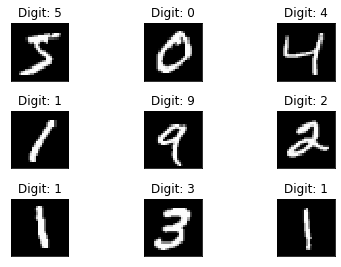

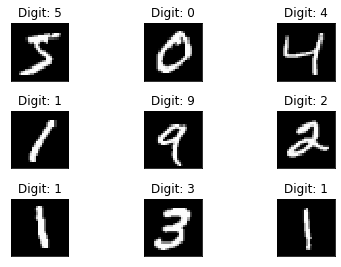

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(raw_train_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(raw_train_labels[i]))
  plt.xticks([])
  plt.yticks([])
fig


Reshaping the input data from 28 X 28 to a single vector holding all the pixel values

In [ ]:
train_images = raw_train_images.reshape((60000, 28 * 28))
#normalizing the dataa
train_images = train_images.astype('float32') / 255

test_images = raw_test_images.reshape((10000, 28 * 28))
#normalizing the data
test_images = test_images.astype('float32') / 255

In [ ]:
#insoecting the output
print(np.unique(raw_train_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [ ]:
print('The dimensions of the training data are', train_images.shape, '\n')
print('The dimensions of the training data are', test_images.shape, '\n')

The dimensions of the training data are (60000, 784) 

The dimensions of the training data are (10000, 784) 



Let's encode our categories - digits from 0 to 9 - using one-hot encoding. The result is a vector with a length equal to the number of categories. The vector is all zeroes except in the position for the respective category. Thus a '5' will be represented by [0,0,0,0,1,0,0,0,0].

In [ ]:
train_labels = to_categorical(raw_train_labels)
test_labels  = to_categorical(raw_test_labels)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 3.1 Systematic Design of Neural Network architectures using Error Analysis
We will use error analysis to systematically choose the better architecture for our network out of a selected list of architectures to avoid premature optimization. We randomly select 4 different architectures and analyze their performance. This system has been designed in a way to make the network optimization iterative till the relatively better model is obtained. 

In this section we will be comparing  4 different Neural Networks architectures using the following; <br/>
* We will use two different activation functions, we will use relu for the hidden layers and softmax for the output layer.
* We will also compare multiple step sizes for each of the network architectures.
* Multiple batch sizes would be tested for all the network architectures
* We will use four different parameter initializations and compared their performance for each of the networks. They are the zero initialization, random initialization, glorot initialization and the He-et-al initialization.
* Finally we will use three optimisation algorithms and compare them namely Rmsprop, Adam optimizer and the stochastic gradient descent.
* For the stochastic gradient descent algorithm we will also be comparing the different network's performance based on different momentum coefficients.

### Methodology
To ensure we compare networks with similar parameters, we will be creating A single class that can be used for any of the optimizers such as the Adam optimizer, Rmsprop optimizer and the stochastic gradient descent algorithm. We used this approach to ensure we tick all the comparison criterias we listed above. 

<u>Optimizer Objects</u><br/>
 The class created will take 4 arguments(hidden layer activation function and output layer activation function,optimizer and momentum coefficient). This would help us satisfy the comparison of our networks in terms of using different optimizers and how they performed when different activation function configurations were used.<br/>
The class has 3 methods which are:
* Comparing different step sizes for each network architecture and seeing how well they perform for each of these step sizes.
* Comparing different batch sizes for each network architecture and measuring their performance for each of the batch sizes.
* Finally, the third method(function) for our classes compares How well each architecture performed with regards using differnt iniialization method which are the zero initialization, random initialization, glorot initialization and the He-et-al initialization.

Using these method we will be able to compare the four different neural network architectures using the comparison criterias listed above. The steps taken for this are listed below. <br/>

<u>Steps</u>
* Initialize one of the class with one of the three optimiz34w (MnistNetwork_ADAM,MnistNetwork_RMSprop and MnistNetwork_RMSprop) and pass the required argument which are the hidden layer, output layer activation functions and momentum coefficients preferred by the user. For this task we compared the performance of the four networks using (relu/softmax).
* Call one of the three method/function in each classes(diff_network_step,diff_network_batch and diff_network_param) each would return a plot of the loss error for each network based on the different step sizes, batch sizes and parameter initialization method.<br/>

### <u>Classes, methods and attributes used</u>
We will be exploring the paradigm found in the MnistNetwork class created, we will explore the methods and what they return and the attributes of the class.


* Method diff_network_step: This is a method or function of the class which returns a plot of the different error loss to the number of epochs for each of the different step sizes used which are step_sizes = [0.001,0.01,0.003,0.03]. 

* Method diff_network_batch: This is a method or function of the class which returns a plot of the different error loss to the number of epochs for each of the different batch sizes used which are batch_sizes = [64,400,82,150,250]

* Method diff_network_param: This is a method or function of the  class which returns a plot of the different error loss to the number of epochs for each of the different parameter initialization methods used which are random, zero, glorot and He-et-al initialization.

**Stochastic Gradient descent**:
When using the stochastic gradient descent optimizer we used a for loop to iterate over the selected momentum coefficients to be used([0,0.5,0.8,0.9]) and return plot for each of the momentum.

This is the general pattern that can be found in each of the three classes created for this task.




In [ ]:
#create class for the network
class MnistNetwork():
  np.random.seed(2021)
  tf.random.set_seed(2021)
  #initialize the required arguments
  def __init__(self,i_act,l_act,optimizer,momentum_coef=0):
    self.optimizer = optimizer
    self.i_act = i_act
    self.l_act = l_act
    self.momentum_coef = momentum_coef
  """This is a method that returns the plot of the errors passsed into it"""
  def plot_error(self,train_errors_1,train_errors_2,train_errors_3,train_errors_4,m_name):
    self.train_errors_1 = train_errors_1
    self.train_errors_2 = train_errors_2
    self.train_errors_3 = train_errors_3
    self.train_errors_4 = train_errors_4
    self.m_name = m_name
    #create dataframe from error outputs
    df1 = pd.DataFrame.from_dict(self.train_errors_1)
    df2 = pd.DataFrame.from_dict(self.train_errors_2)
    df3 = pd.DataFrame.from_dict(self.train_errors_3)
    df4 = pd.DataFrame.from_dict(self.train_errors_4)
    #create a subplot of all the errors from the different networks
    _ = fig, axes = plt.subplots(nrows=2, ncols=2)
    _ = fig.tight_layout(pad=2.0, w_pad=0.5, h_pad=2.0)
    _ = fig.suptitle('Plot comparing {}'.format(self.m_name))
    ax1 = df1.plot(ax=axes[0,0],title='Network Architecture 1',figsize=(11,8),ylim=(0,1))
    ax2 = df2.plot(ax=axes[0,1],title='Network Architecture 2',figsize=(11,8),ylim=(0,1) )
    ax3 = df3.plot(ax=axes[1,0],title='Network Architecture 3',figsize=(11,8),ylim=(0,1))
    ax4 = df4.plot(ax=axes[1,1],title='Network Architecture 4',figsize=(11,8),ylim=(0,1))

    for ax in fig.get_axes():
      ax.label_outer()
      ax.set_xlabel("Epochs")
      ax.set_ylabel("Errors")

  """This is a method that compares the different step sizes specified"""
  def diff_network_step(self):
    m_name = "Step Sizes"
    from cycler import cycler
    step_sizes = [0.001,0.01,0.003,0.0003]
    train_errors_1 = {}
    train_errors_2 = {}
    train_errors_3 = {}
    train_errors_4 = {}
    acc_1 = {}
    acc_2 = {}
    acc_3 = {}
    acc_4 = {}
    for step_size in step_sizes:
      np.random.seed(2021)
      tf.random.set_seed(2021)
      if self.optimizer == 'Adam':
        self.opt = optimizers.Adam(step_size)
      elif self.optimizer == 'RMSprop':
        self.opt = optimizers.RMSprop(step_size)
      elif self.optimizer == 'SGD':
        self.opt = optimizers.SGD(step_size,momentum=self.momentum_coef)

      #network 1
      network_1 = models.Sequential()
      network_1.add(layers.Dense(100, activation=self.i_act, input_shape=(784,)))
      network_1.add(layers.Dense(50, activation=self.i_act))
      network_1.add(layers.Dense(10, activation=self.l_act))
      network_1.compile(optimizer=self.opt,loss='categorical_crossentropy',metrics=['accuracy'])
      history_1=network_1.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= 400)
      train_errors_1[step_size] = history_1.history["loss"]
      acc_1[step_size] = history_1.history["accuracy"]



      #network 2
      network_2 = models.Sequential()
      network_2.add(layers.Dense(200, activation=self.i_act, input_shape=(784,)))
      network_2.add(layers.Dense(150, activation=self.i_act))
      network_2.add(layers.Dense(50, activation=self.i_act))
      network_2.add(layers.Dense(10, activation=self.l_act))
      network_2.compile(optimizer=self.opt,loss='categorical_crossentropy',metrics=['accuracy'])
      history_2=network_2.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= 400)
      train_errors_2[step_size] = history_2.history["loss"]
      acc_2[step_size] = history_2.history["accuracy"]



      #network 3
      network_3 = models.Sequential()
      network_3.add(layers.Dense(100, activation=self.i_act, input_shape=(784,)))
      network_3.add(layers.Dense(50, activation=self.i_act))
      network_3.add(layers.Dense(50, activation=self.i_act))
      network_3.add(layers.Dense(50, activation=self.i_act))
      network_3.add(layers.Dense(10, activation=self.l_act))
      network_3.compile(optimizer=self.opt,loss='categorical_crossentropy',metrics=['accuracy'])
      history_3=network_3.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= 400)
      train_errors_3[step_size] = history_3.history["loss"]
      acc_3[step_size] = history_3.history["accuracy"]
  

      #network 4
      network_4 = models.Sequential()
      network_4.add(layers.Dense(200, activation=self.i_act, input_shape=(784,)))
      network_4.add(layers.Dense(150, activation=self.i_act))
      network_4.add(layers.Dense(150, activation=self.i_act))
      network_4.add(layers.Dense(50, activation=self.i_act))
      network_4.add(layers.Dense(10, activation=self.l_act))
      network_4.compile(optimizer=self.opt,loss='categorical_crossentropy',metrics=['accuracy'])
      history_4=network_4.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= 400)
      train_errors_4[step_size] = history_4.history["loss"]
      acc_4[step_size] = history_4.history["accuracy"]
    
    #plotting the error
    self.plot_error(train_errors_1,train_errors_2,train_errors_3,train_errors_4,m_name)
    accuracy1 = pd.DataFrame.from_dict(acc_1)
    accuracy2 = pd.DataFrame.from_dict(acc_2)
    accuracy3 = pd.DataFrame.from_dict(acc_3)
    accuracy4 = pd.DataFrame.from_dict(acc_4)
    frames = [accuracy1.tail(1), accuracy2.tail(1), accuracy3.tail(1),accuracy4.tail(1)]
    arch_result = pd.concat(frames, keys=['Architecture 1, Epoch', 'Architecture 2, Epoch', 'Architecture 3, Epoch','Architecture 4, Epoch'])
    output_message = "These are the accuracies of the different architectures when comparing Step Sizes"
    return (output_message,arch_result)
  
  """This is a method that compares the different batch sizes specified"""
  def diff_network_batch(self,step_size):
    self.step_size = step_size
    m_name = "Batch Sizes"
    batch_sizes = [64,400,82,150,250]
    train_errors_1 = {}
    train_errors_2 = {}
    train_errors_3 = {}
    train_errors_4 = {}
    #epochs = 200
    #i_act = 'relu'
    #l_act = 'softmax'
    acc_1 = {}
    acc_2 = {}
    acc_3 = {}
    acc_4 = {}

    for batch_size in batch_sizes:
      np.random.seed(2021)
      tf.random.set_seed(2021)
      if self.optimizer == 'Adam':
        self.opt = optimizers.Adam(self.step_size)
      elif self.optimizer == 'RMSprop':
        self.opt = optimizers.RMSprop(self.step_size)
      elif self.optimizer == 'SGD':
        self.opt = optimizers.SGD(self.step_size,momentum=self.momentum_coef)
      network_1 = models.Sequential()
      network_1.add(layers.Dense(100, activation=self.i_act, input_shape=(784,)))
      network_1.add(layers.Dense(50, activation=self.i_act))
      network_1.add(layers.Dense(10, activation=self.l_act))
      network_1.compile(optimizer=self.opt,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


      ## 3 ## Train
      #history = network.fit(train_images, train_labels, epochs=5)

      history_1=network_1.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= batch_size)
      train_errors_1[batch_size] = history_1.history["loss"]
      acc_1[batch_size] = history_1.history["accuracy"]

      network_2 = models.Sequential()
      network_2.add(layers.Dense(200, activation=self.i_act, input_shape=(784,)))
      network_2.add(layers.Dense(150, activation=self.i_act))
      network_2.add(layers.Dense(50, activation=self.i_act))
      network_2.add(layers.Dense(10, activation=self.l_act))
      network_2.compile(optimizer=self.opt,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


      ## 3 ## Train
      #history = network.fit(train_images, train_labels, epochs=5)

      history_2=network_2.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= batch_size)
      train_errors_2[batch_size] = history_2.history["loss"]
      acc_2[batch_size] = history_2.history["accuracy"]
   


      network_3 = models.Sequential()
      network_3.add(layers.Dense(100, activation=self.i_act, input_shape=(784,)))
      network_3.add(layers.Dense(50, activation=self.i_act))
      network_3.add(layers.Dense(50, activation=self.i_act))
      network_3.add(layers.Dense(50, activation=self.i_act))
      network_3.add(layers.Dense(10, activation=self.l_act))
      network_3.compile(optimizer=self.opt,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


      ## 3 ## Train
      #history = network.fit(train_images, train_labels, epochs=5)

      history_3=network_3.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= batch_size)
      train_errors_3[batch_size] = history_3.history["loss"]
      acc_3[batch_size] = history_3.history["accuracy"]  

      network_4 = models.Sequential()
      network_4.add(layers.Dense(200, activation=self.i_act, input_shape=(784,)))
      network_4.add(layers.Dense(150, activation=self.i_act))
      network_4.add(layers.Dense(150, activation=self.i_act))
      network_4.add(layers.Dense(50, activation=self.i_act))
      network_4.add(layers.Dense(10, activation=self.l_act))
      network_4.compile(optimizer=self.opt,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


      ## 3 ## Train
      #history = network.fit(train_images, train_labels, epochs=5)

      history_4=network_4.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= batch_size)
      train_errors_4[batch_size] = history_4.history["loss"]
      acc_4[batch_size] = history_4.history["accuracy"]
    
    #plotting the error
    self.plot_error(train_errors_1,train_errors_2,train_errors_3,train_errors_4,m_name)
    accuracy1 = pd.DataFrame.from_dict(acc_1)
    accuracy2 = pd.DataFrame.from_dict(acc_2)
    accuracy3 = pd.DataFrame.from_dict(acc_3)
    accuracy4 = pd.DataFrame.from_dict(acc_4)
    frames = [accuracy1.tail(1), accuracy2.tail(1), accuracy3.tail(1),accuracy4.tail(1)]
    arch_result = pd.concat(frames, keys=['Architecture 1, Epoch', 'Architecture 2, Epoch', 'Architecture 3, Epoch','Architecture 4, Epoch'])
    output_message = "These are the accuracies of the different architectures when comparing Batch Sizes"
    return (output_message,arch_result)



  
  """This is a method that compares the different network parameters specified"""
  def diff_network_param(self,step_size,batch_size,momentum_coef):
    from cycler import cycler    
    self.batch_size = batch_size
    self.momentum_coef = momentum_coef
    inits = (initializers.Zeros(),initializers.RandomUniform(minval=0.5,maxval=0.5,seed=1), initializers.glorot_uniform(seed=1),initializers.he_uniform(seed=1))
    init_legend = ('Zeros','Random Uniform - 0.5 to 0.5','Glorot Uniform', 'He Uniform')
    self.step_size = step_size
    train_errors_1 = {}
    train_errors_2 = {}
    train_errors_3 = {}
    train_errors_4 = {}
    #epochs = 200
    #i_act = 'relu'
    #l_act = 'softmax'

    for index, init in enumerate(inits):
      np.random.seed(2021)
      tf.random.set_seed(2021)
      if self.optimizer == 'Adam':
        self.opt = optimizers.Adam(self.step_size)
      elif self.optimizer == 'RMSprop':
        self.opt = optimizers.RMSprop(self.step_size)
      elif self.optimizer == 'SGD':
        self.opt = optimizers.SGD(self.step_size,momentum=self.momentum_coef)
      network_1 = models.Sequential()
      network_1.add(layers.Dense(100, activation=self.i_act,kernel_initializer= init, input_shape=(784,)))
      network_1.add(layers.Dense(50, activation=self.i_act,kernel_initializer= init))
      network_1.add(layers.Dense(10, activation=self.l_act,kernel_initializer= init))
      network_1.compile(optimizer=self.opt,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


      ## 3 ## Train
      #history = network.fit(train_images, train_labels, epochs=5)

      history_1=network_1.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= self.batch_size)
      train_errors_1[init] = history_1.history["loss"]


      network_2 = models.Sequential()
      network_2.add(layers.Dense(200, activation=self.i_act,kernel_initializer= init, input_shape=(784,)))
      network_2.add(layers.Dense(150, activation=self.i_act,kernel_initializer= init))
      network_2.add(layers.Dense(50, activation=self.i_act,kernel_initializer= init))
      network_2.add(layers.Dense(10, activation=self.l_act,kernel_initializer= init))
      network_2.compile(optimizer=self.opt,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


      ## 3 ## Train
      #history = network.fit(train_images, train_labels, epochs=5)

      history_2=network_2.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= self.batch_size)
      train_errors_2[init] = history_2.history["loss"]


      network_3 = models.Sequential()
      network_3.add(layers.Dense(100, activation=self.i_act,kernel_initializer= init, input_shape=(784,)))
      network_3.add(layers.Dense(50, activation=self.i_act,kernel_initializer= init))
      network_3.add(layers.Dense(50, activation=self.i_act,kernel_initializer= init))
      network_3.add(layers.Dense(50, activation=self.i_act,kernel_initializer= init))
      network_3.add(layers.Dense(10, activation=self.l_act,kernel_initializer= init))
      network_3.compile(optimizer=self.opt,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


      ## 3 ## Train
      #history = network.fit(train_images, train_labels, epochs=5)

      history_3=network_3.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= self.batch_size)
      train_errors_3[init] = history_3.history["loss"]


      network_4 = models.Sequential()
      network_4.add(layers.Dense(200, activation=self.i_act,kernel_initializer= init, input_shape=(784,)))
      network_4.add(layers.Dense(150, activation=self.i_act,kernel_initializer= init))
      network_4.add(layers.Dense(150, activation=self.i_act,kernel_initializer= init))
      network_4.add(layers.Dense(50, activation=self.i_act,kernel_initializer= init))
      network_4.add(layers.Dense(10, activation=self.l_act,kernel_initializer= init))
      network_4.compile(optimizer=self.opt,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


      ## 3 ## Train
      #history = network.fit(train_images, train_labels, epochs=5)

      history_4=network_4.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=0, batch_size= self.batch_size)
      train_errors_4[init] = history_4.history["loss"]
    colors = plt.rcParams['axes.prop_cycle'].by_key()["color"]
    default_cycler = (cycler(color=colors) + 
                    cycler(linestyle=["-","--",":","-.","-","--",":","-.","-","--"]))
    plt.rc('lines', linewidth=1.4)
    plt.rc('axes', prop_cycle=default_cycler)
    lines1 = plt.plot(np.array(list(train_errors_1.values())).transpose())
    #plt.title("Training errors")
    plt.xlabel("Epochs for network 1")
    plt.ylabel("Error for network 1")
    plt.title("Loss Error plot for network 1")
    plt.ylim(0,1)
    plt.legend(lines1[:], init_legend, loc="upper right")
    plt.show()

    lines2 = plt.plot(np.array(list(train_errors_2.values())).transpose())
    #plt.title("Training errors")
    plt.xlabel("Epochs for network 2")
    plt.ylabel("Error for network 2")
    plt.title("Loss Error plot for network 2")
    plt.ylim(0,1)
    plt.legend(lines2[:], init_legend, loc="upper right")
    plt.show()

    lines3 = plt.plot(np.array(list(train_errors_3.values())).transpose())
    #plt.title("Training errors")
    plt.xlabel("Epochs for network 3")
    plt.ylabel("Error for network 3")
    plt.title("Loss Error plot for network 3")
    plt.ylim(0,1)
    plt.legend(lines3[:], init_legend, loc="upper right")
    plt.show()

    lines4 = plt.plot(np.array(list(train_errors_4.values())).transpose())
    #plt.title("Training errors")
    plt.xlabel("Epochs for network 4")
    plt.ylabel("Error for network 4")
    plt.title("Loss Error plot for network ")
    plt.ylim(0,1)
    plt.legend(lines4[:], init_legend, loc="upper right")
    plt.show()

# 3.2 Model Comparison
We will start comparing the 4 different network architectures

## Comparing Step sizes for different step sizes using Adam, RMSprop and SGD optimizer
We can start a top down approach checking step sizes batch sizes and others.

### **Using Relu and Softmax**

### Comparing step sizes for different architectures using Adam optimizer


In [ ]:
Adam_opt_rel_sof = MnistNetwork('relu','softmax','Adam')

Here we are comparing the performance of the different architectures across a range of step sizes, the relu was used in the hidden layer and softmax for the output layer. The result gave us the error plot and the training accuracy. We observed that the error for step size 0.01 performed relativelt bad across the different architectures from the error plot except for architecture 1 while 0.0003 performed badly only on architecture 1 but was relatively good on all other architectures. The error plot and the training accuracy plot showed that for architecture 2 and 4 0.001 was able to find the minimum error in lesser number of epochs than the others. This means step size 0.001 gives the preferable learning curve among all the step sizes used across the network architectures. 

('These are the accuracies of the different architectures when comparing Step Sizes',
                             0.0010    0.0100    0.0030    0.0003
 Architecture 1, Epoch 19  0.996020  0.989925  0.999975  0.976542
 Architecture 2, Epoch 19  1.000000  0.979626  0.999204  0.997662
 Architecture 3, Epoch 19  0.999104  0.939103  0.994502  0.989229
 Architecture 4, Epoch 19  1.000000  0.958482  0.998060  0.999478)

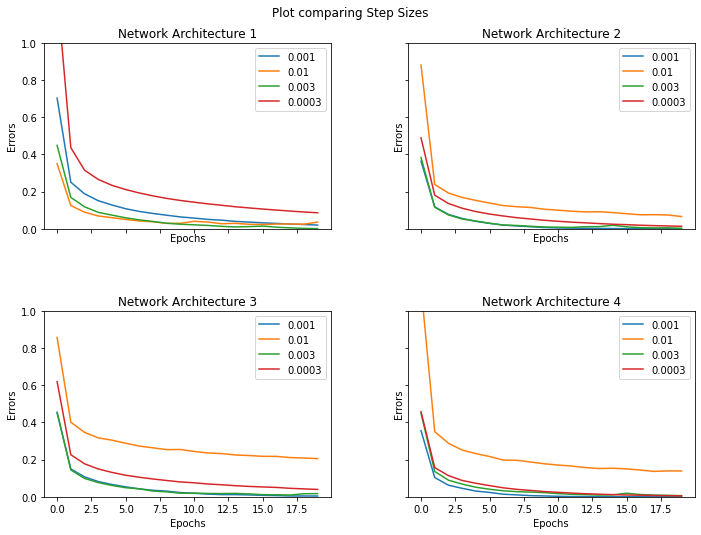

In [ ]:
#comparing performance based on step sizes
Adam_opt_rel_sof.diff_network_step()

### Comparing step sizes for different architectures using RMSprop optimizer

Comparing the performance of the different architectures across a range of step sizes, the relu was used in the hidden layer and softmax for the output layer using RMSprop optimizer. The result gave us the error plot and the training accuracy. From the error plot and training accuracy we observed that using the RMSprop network architecture 2 and 4 was able to find the minimal error at a lesser epoch than the rest of the architectures. We observe that Network Architecture 4 had the better learning curve with step size of 0.001.

In [ ]:
Rmsprop_opt_rel_sof = MnistNetwork('relu','softmax','RMSprop')

('These are the accuracies of the different architectures when comparing Step Sizes',
                             0.0010    0.0100    0.0030    0.0003
 Architecture 1, Epoch 19  0.994328  0.993109  0.997562  0.976616
 Architecture 2, Epoch 19  0.997711  0.990771  0.996691  0.990821
 Architecture 3, Epoch 19  0.995000  0.986741  0.995746  0.980348
 Architecture 4, Epoch 19  0.997861  0.989303  0.997090  0.994129)

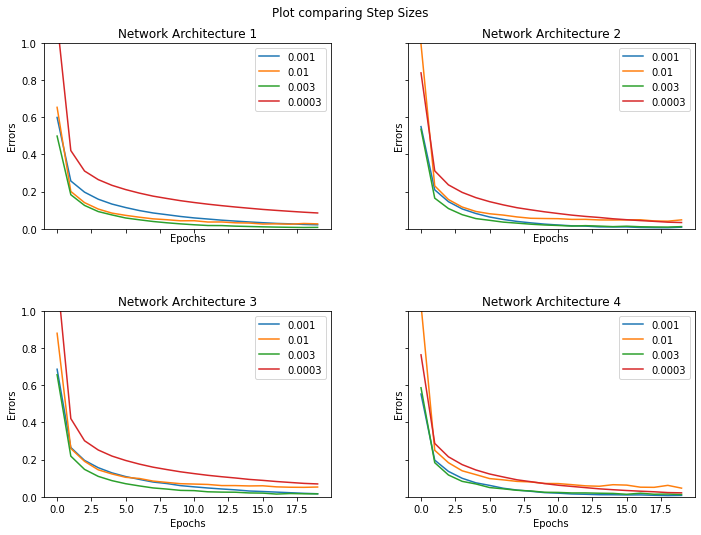

In [ ]:
#comparing performance based on step sizes
Rmsprop_opt_rel_sof.diff_network_step()

### Comparing step sizes for different architectures using Stochastic Gradient Descent optimizer

Comparing the different architectures using the Stochastic gradient descent  optimizer across different momentum. We observed that Momentum 0.8 and 0.9 had the better momentum of all the momentum coefficient used. The learning curve for momentum 0.8 and 0.9 showed better performance across all network architectures.

Now running momentim_coef 0 for step sizes comparison
Now running momentim_coef 0.5 for step sizes comparison
Now running momentim_coef 0.8 for step sizes comparison
Now running momentim_coef 0.9 for step sizes comparison


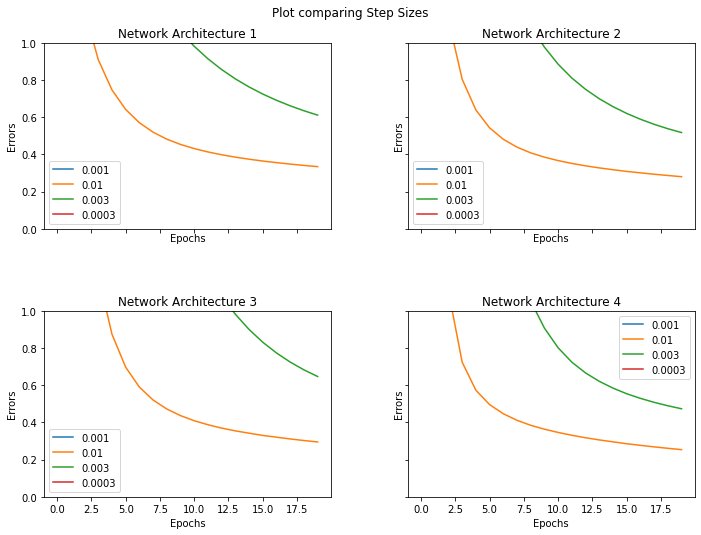

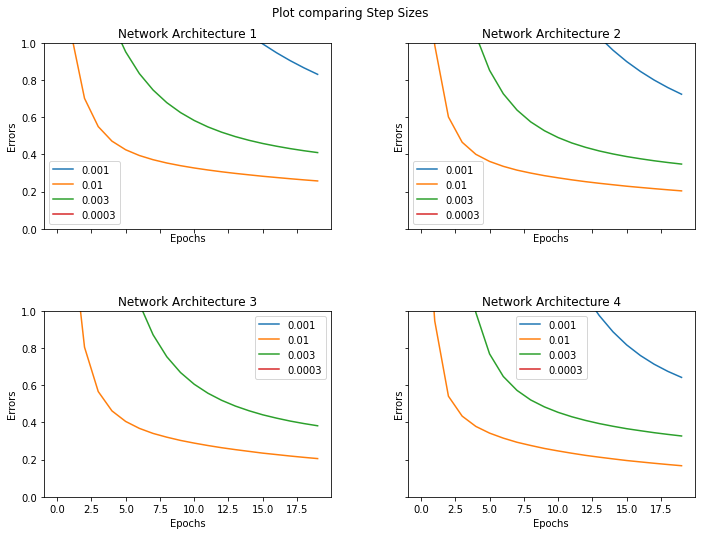

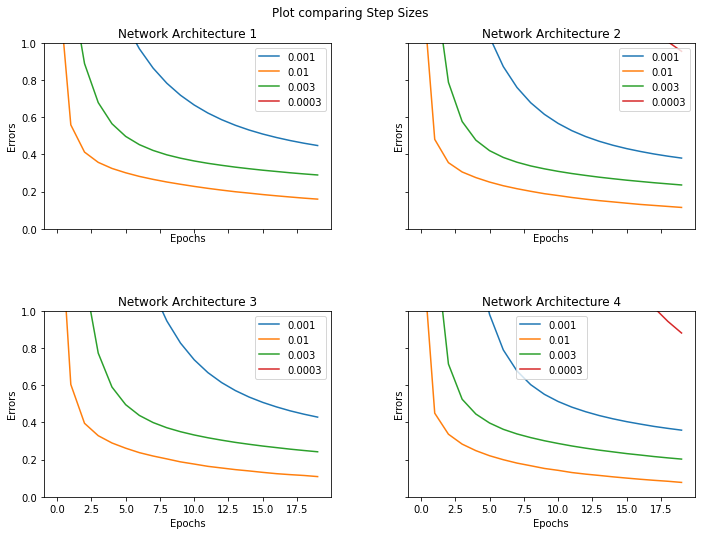

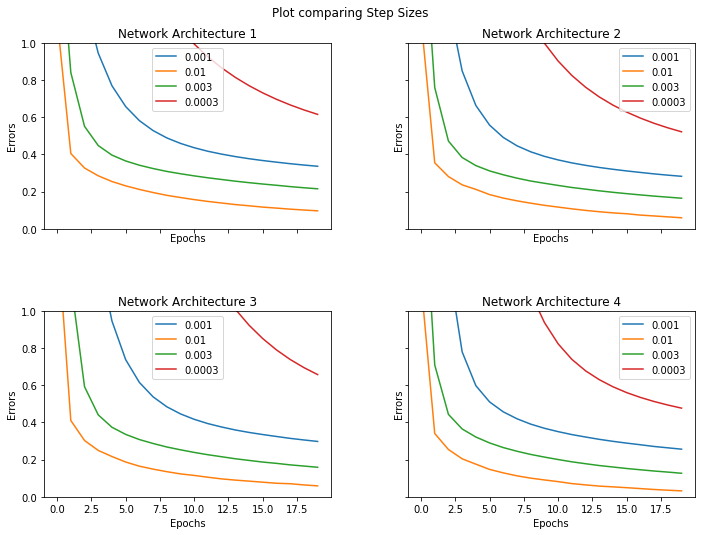

In [ ]:
#comparing performance based on step sizes
momentum_coefs = [0,0.5,0.8,0.9]
for momentum_coef in momentum_coefs:
  print("Now running momentim_coef {} for step sizes comparison".format(momentum_coef))
  SGD_opt_rel_sof = MnistNetwork('relu','softmax','SGD',momentum_coef)
  SGD_opt_rel_sof.diff_network_step()

### Conclusion for Step size comparison

We observed that comparing step sizes using Adam, RMSprop and Stochastic gradient descent optimizer across 4 different network architectures the best performance in terms of learning curve was observed when we used step size 0.001 hence we will proceed to comparing batch sizes using this step size as the default step size across the different architectures. We observed that across the different optimizers network architecture 2 and 4 had the better performance hence in terms of step size comparison architecture 2 and 4 are preferred.

## Comparing Batch sizes  using Adam, RMSprop and SGD optimizer

### Adam optimizer

Comparing different batch sizes across the different architectures, we observe similar learning rate for network 2,3 and 4 but we noticed a longer learning curve for network 1. The best performance in terms of learning curve and performance was observed for network architecture 2 and 4 when using batch size 400. Also across all the network architectires we observed batch size 400 had the better performance.

('These are the accuracies of the different architectures when comparing Batch Sizes',
                                64        400       82        150       250
 Architecture 1, Epoch 19  0.998134  0.996020  0.996393  0.998408  0.997910
 Architecture 2, Epoch 19  0.996866  1.000000  0.998980  1.000000  0.999950
 Architecture 3, Epoch 19  0.995696  0.999104  0.996866  0.998632  0.998955
 Architecture 4, Epoch 19  0.997090  1.000000  0.997861  0.997139  1.000000)

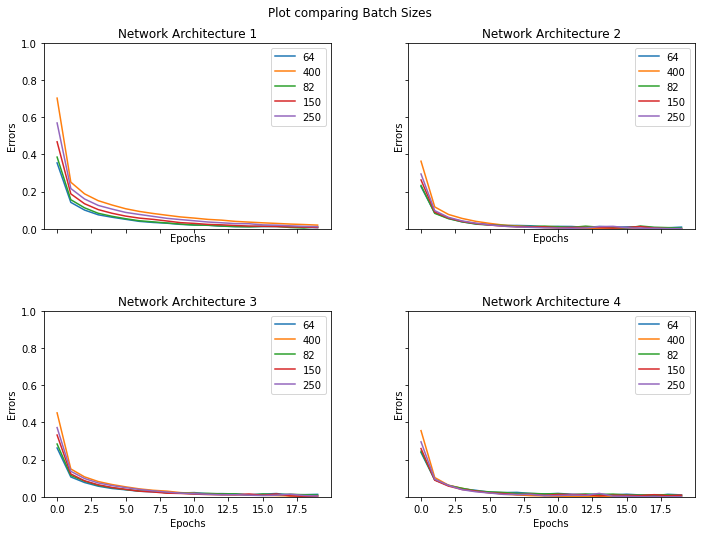

In [ ]:
#comparing performance based on step sizes
Adam_opt_rel_sof.diff_network_batch(0.001)

### RMSprop optimizer

In this step we are comparing the batch sizes performane of different network architectures for the RMSprop optimizer. Although we observed a longer learning rate compared to the Adam optimizer, it is shown from the plot below that batch size 82 had the better performance and learning rate across all the architectures compared. Network 4 had the better performance observed from the error plot and the training set accuracy.

('These are the accuracies of the different architectures when comparing Batch Sizes',
                                64        400       82        150       250
 Architecture 1, Epoch 19  0.997786  0.994328  0.997985  0.997363  0.996691
 Architecture 2, Epoch 19  0.998109  0.997711  0.998308  0.998458  0.998706
 Architecture 3, Epoch 19  0.997114  0.995000  0.996592  0.997015  0.996293
 Architecture 4, Epoch 19  0.996915  0.997861  0.997090  0.997662  0.998035)

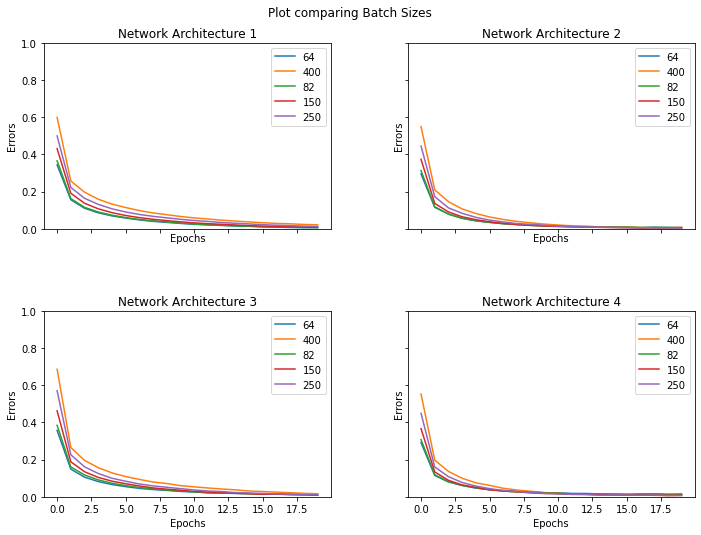

In [ ]:
#comparing performance based on step sizes
Rmsprop_opt_rel_sof.diff_network_batch(0.001)

### Stochastic Gradient Descent optimizer

### Comparing step sizes for different architectures using RMSprop optimizer
Using stochastic gradient descent with multiple momentum displayed a learning curve which takes more epoch to reach the minimum across all the different batch sizes and momentum used. This test showed that using stochastic gradient descent for the network architectures did not yield optimal learning curve and performance.

Now running momentim_coef 0 for step sizes comparison
Now running momentim_coef 0.5 for step sizes comparison
Now running momentim_coef 0.8 for step sizes comparison
Now running momentim_coef 0.9 for step sizes comparison


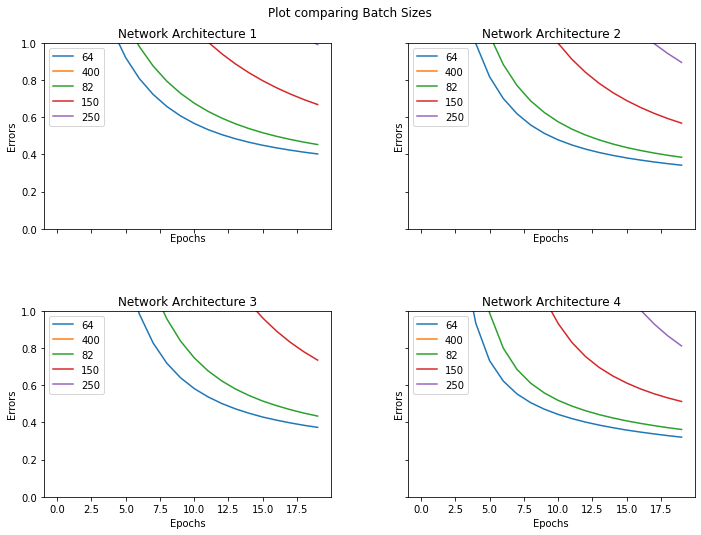

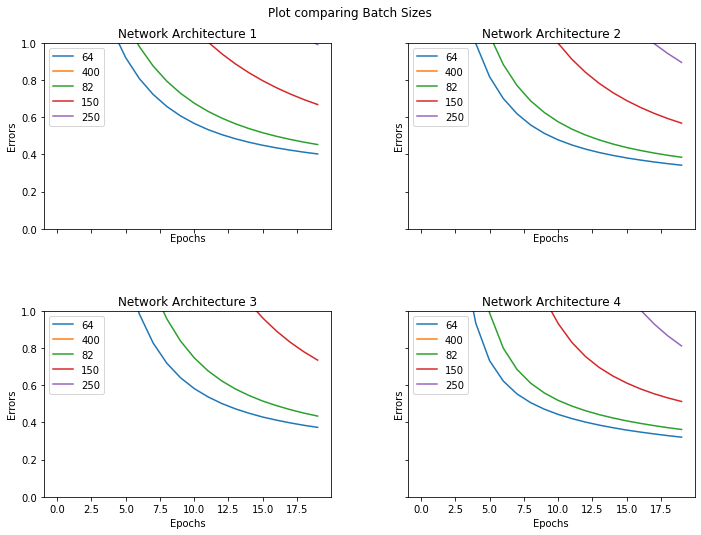

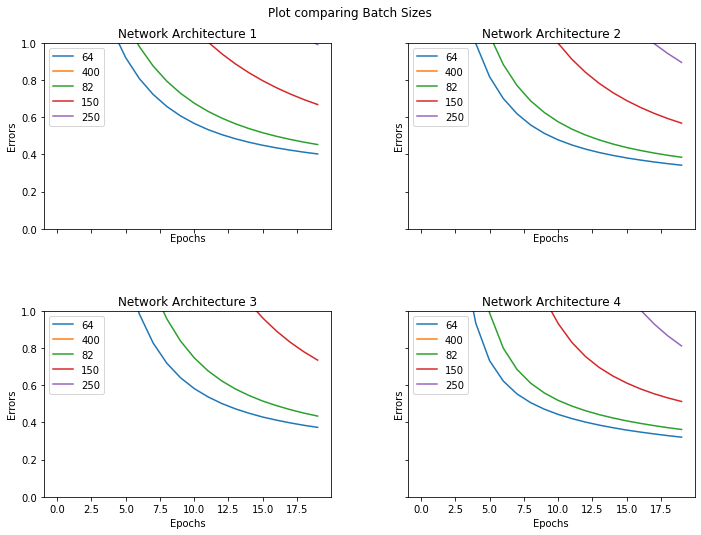

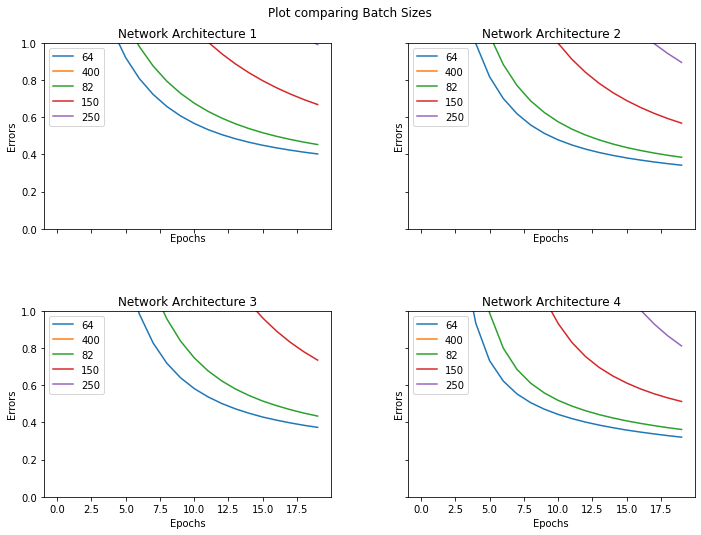

In [ ]:
#comparing performance based on step sizes
momentum_coefs = [0,0.5,0.8,0.9]
for momentum_coef in momentum_coefs:
  print("Now running momentim_coef {} for step sizes comparison".format(momentum_coef))
  SGD_opt_rel_sof = MnistNetwork('relu','softmax','SGD')
  SGD_opt_rel_sof.diff_network_batch(0.001)

### Conclusion for Batch size comparison

For batch size comparison we observed that RMSprop and Adams optimizer for batch size 400 had the better performance across all the network architectures with network architecture 4 having the best performance. Stochastic gradient descent optimizer performed woefully across all the momentum coefficients used.

## Comparing parameter initializers  using Adam, RMSprop and SGD optimizer
In the last steps we observed that batch size 400 and step size 0.001 were the parameters giving the best performance across all the network architectures. In this phase we will find the best parameter initializer by specifying batch size 400 and step size 0.001 as default values.

### Adam optimizer
We observe that across all the different network architectures Glorot and He-et-al initializers performed relatively good and the zero and random initializers an assumption is that they were unable to find the gradients due to dead neurons.

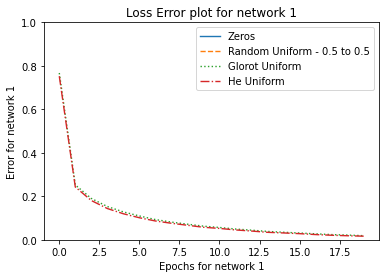

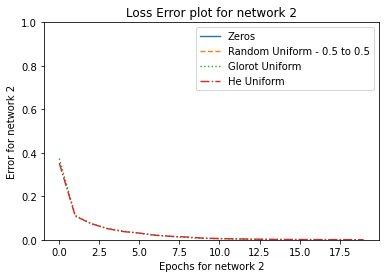

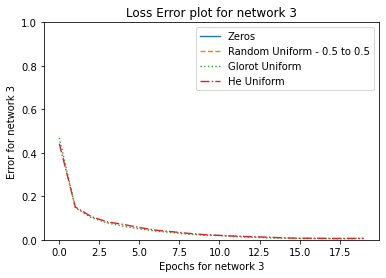

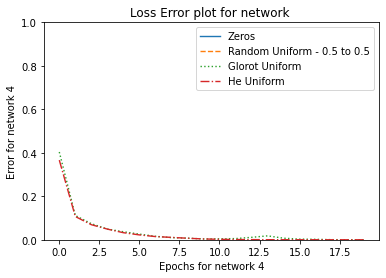

In [ ]:
#comparing performance based on parameter initialization
Adam_opt_rel_sof.diff_network_param(0.001,400)

### RMSprop optimizer
Similar pattern observed for the Adam optimizer was also observed for the RMSprop across all the different network architectures Glorot and He-et-al initializers performed relatively good and the zero and random initializers an assumption is that they were unable to find the gradients due to dead neurons.

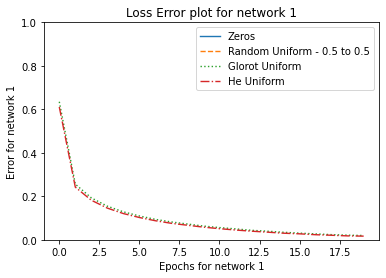

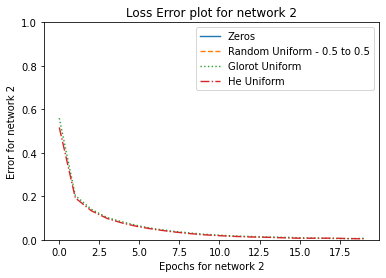

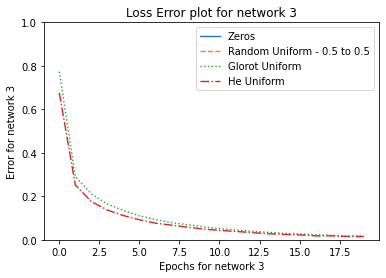

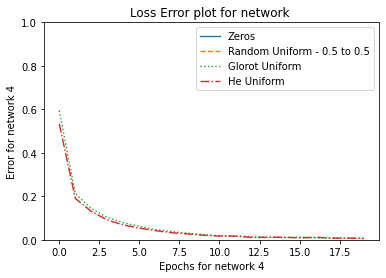

In [ ]:
#comparing performance based on parameter initialization
Rmsprop_opt_rel_sof.diff_network_param(0.001,400)

### Stochastic Gradient Descent optimizer

For the stochastic gradient descent we observed that for momentum coefficients 0 and 0.5 the optimizer was unable to find the parameters to minimize the error in the number of epochs used, we assumed this is due to the fact that we were using a low learning rate which means it would take time for the algorithm to reach the local optima. This shows that although we observed good performance for 0.001 in other test for this particular test a better step size could have been 0.01. As seen with other optimizers, for momentum coefficient 0.9 Glorot and He-et-al initializers performed relatively good and the zero and random initializers an assumption is that they were unable to find the gradients due to dead neurons.

Now running momentim_coef 0 for step sizes comparison


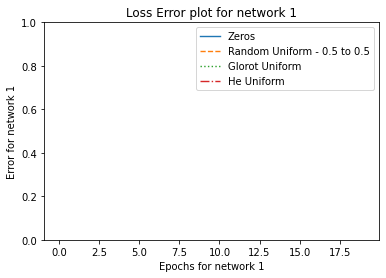

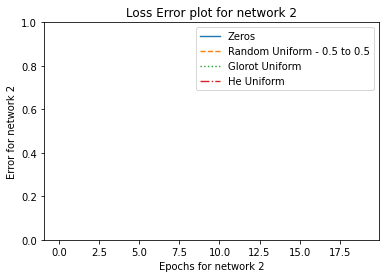

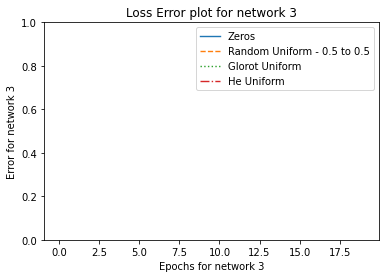

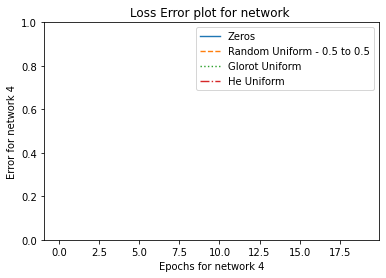

Now running momentim_coef 0.5 for step sizes comparison


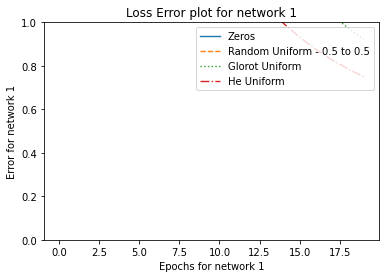

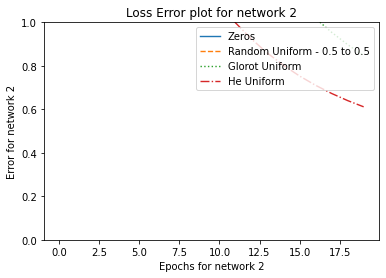

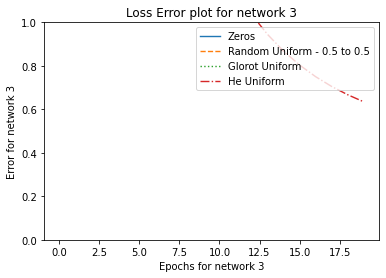

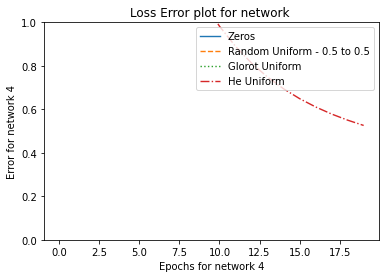

Now running momentim_coef 0.8 for step sizes comparison


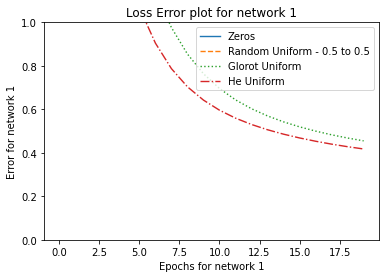

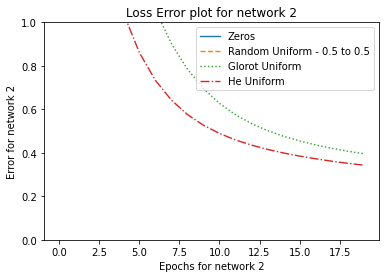

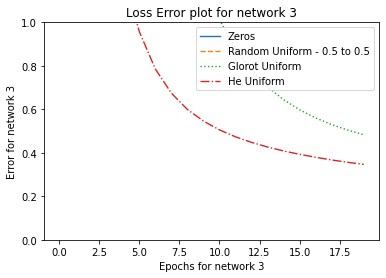

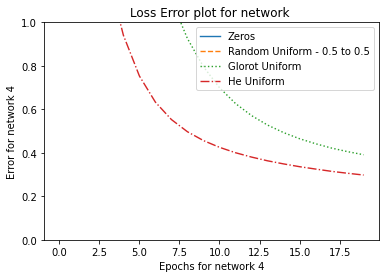

Now running momentim_coef 0.9 for step sizes comparison


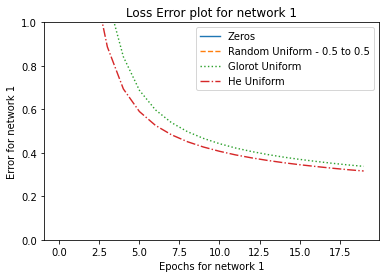

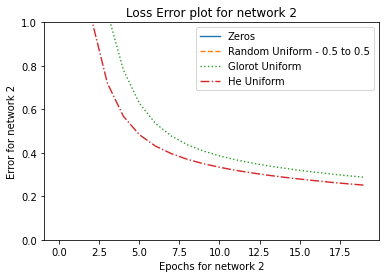

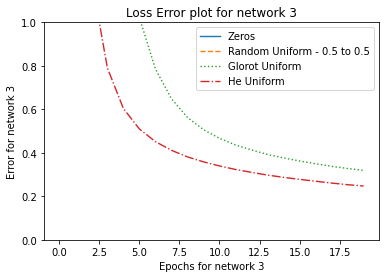

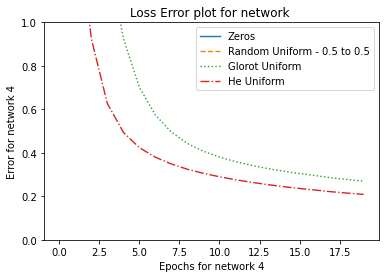

In [ ]:
#comparing performance based on parameter initialization
momentum_coefs = [0,0.5,0.8,0.9]
for momentum_coef in momentum_coefs:
  print("Now running momentim_coef {} for step sizes comparison".format(momentum_coef))
  SGD_opt_rel_sof = MnistNetwork('relu','softmax','SGD')
  SGD_opt_rel_sof.diff_network_param(0.001,400,momentum_coef)

## 3.4 Final Conclusion


Comparing the 4 different architectures above using the different criterias stated showed that different configuration of the parameters, hyperparameters, network depth and width, activation functions and parameter initializations lead to varying performance amongst the different network architectures used. We observed that no single configuration of a network outperformed the others, we can only draw relative conclusions based on the performance of the other networks architecture types using similar configurations of batch sizes, step sizes, parameter initialization and optimization algorithm.
* The best performing step size was 0.001 in this test iteration.
* Batch size 400 had the best performance across all network architectures
* Network architecture 4 consistently showed better relative performance overall when using this parameter initializers.
* For this dataset when using stochastic gradient descent the neural network will perform better if we have a higher momentum for the optimizer.
* Using Zero and random intializer can lead to a dead neuron as the weights would be unable to update if all the input layer had similar initial weights. Glorot and He-et-al had similar performance overall for all the different network architectures used in this task, network architecture 4 consistently showed better relative performance overall when using this parameter initializers.

# Final Model

From the outcome of the tests done in 3.4 above to find the optimal parameters for training the dataset. We will be using the following to implement the final model.

**Initializer** <br/>
Glorot and He-et-al had similar performance overall so we can use either, we will be using the He-et-al initializer.

**Step size** <br/>
Step size 0.001 had a better performance relatively to the other step sizes used.


**Optimizer** <br/>
The Adam optimizer had a better performance overall across the networks compared to other optimizers used.

**Batch size** <br/>
The Batch size 400 had a better overall performance.

**Network** <br/>
Network 4 had a better overall performance compared to other networks in this test.

In [ ]:
#Implementing the best network architectures from our comparison.
step_size = 0.001
network_4 = models.Sequential()
init = initializers.he_uniform(seed=1)
network_4.add(layers.Dense(200, activation='relu',kernel_initializer= init, input_shape=(784,)))
network_4.add(layers.Dense(150, activation='relu',kernel_initializer= init))
network_4.add(layers.Dense(150, activation='relu',kernel_initializer= init))
network_4.add(layers.Dense(50, activation='relu',kernel_initializer= init))
network_4.add(layers.Dense(10, activation='softmax',kernel_initializer= init))
opt = optimizers.Adam(step_size)
network_4.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history_4=network_4.fit(train_images, train_labels,validation_split=0.33,epochs=20,verbose=1, batch_size= 400)

Epoch 1/20
101/101 [==============================] - 2s 14ms/step - loss: 0.9877 - accuracy: 0.6979 - val_loss: 0.1955 - val_accuracy: 0.9426
Epoch 2/20
101/101 [==============================] - 1s 12ms/step - loss: 0.1697 - accuracy: 0.9498 - val_loss: 0.1486 - val_accuracy: 0.9557
Epoch 3/20
101/101 [==============================] - 1s 12ms/step - loss: 0.1022 - accuracy: 0.9710 - val_loss: 0.1324 - val_accuracy: 0.9600
Epoch 4/20
101/101 [==============================] - 1s 12ms/step - loss: 0.0767 - accuracy: 0.9765 - val_loss: 0.1160 - val_accuracy: 0.9663
Epoch 5/20
101/101 [==============================] - 1s 12ms/step - loss: 0.0550 - accuracy: 0.9839 - val_loss: 0.1233 - val_accuracy: 0.9649
Epoch 6/20
101/101 [==============================] - 1s 12ms/step - loss: 0.0448 - accuracy: 0.9863 - val_loss: 0.1080 - val_accuracy: 0.9692
Epoch 7/20
101/101 [==============================] - 1s 12ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.1092 - val_accuracy: 0.9692

In [ ]:
history_dict = history_4.history
print(history_dict.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


The plot below shows a good learning curve, also we observed no sign of bias-variance as the training accuracy is close to the value of the test accuracy. We observed a sharp decrease in the loss error within the first 3 epochs which shows the system is learning fast.

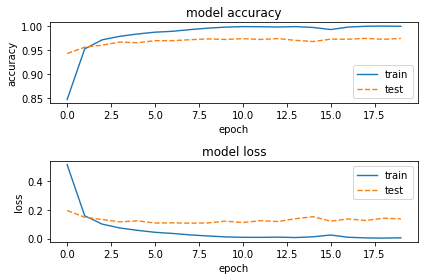

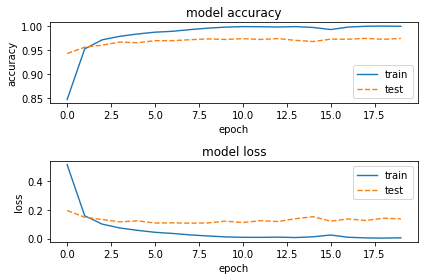

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

### Evaluating model performance


Here we are evaluating the model performance on our test set abd observe an accuracy of 97%, this is not a bad result but we beliee this network can be further optimized to get better accuracy.

In [ ]:
loss_and_metrics = network_4.evaluate(test_images, test_labels, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.1180 - accuracy: 0.9757
Test Loss 0.11796429753303528
Test Accuracy 0.9757000207901001


In [ ]:
output = network_4.predict(test_images)
prediction = np.argmax(output,axis=1) # make predicted digit the one with largest output
is_incorrect = (prediction != raw_test_labels)
incorrect_indices = np.nonzero(is_incorrect)[0] # indices of all the incorrectly classified images

is_correct = (prediction == raw_test_labels)
correct_indices = np.nonzero(is_correct)[0] # indices of all the incorrectly classified images
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


9757  classified correctly
243  classified incorrectly


Viewing the wrongly classified and correctly classified digits, we can observed that our network is doing well and some of the digits it had issue classifying were not so clear.

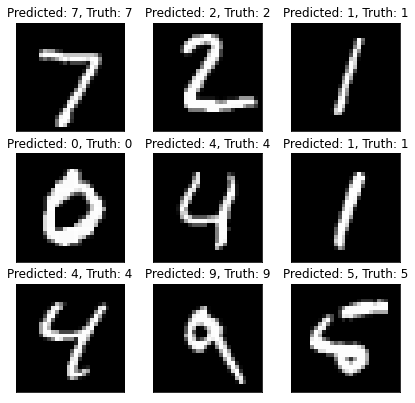

In [ ]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(raw_test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Truth: {}".format(prediction[correct],
                                        raw_test_labels[correct]))
    
    plt.xticks([])
    plt.yticks([])

  


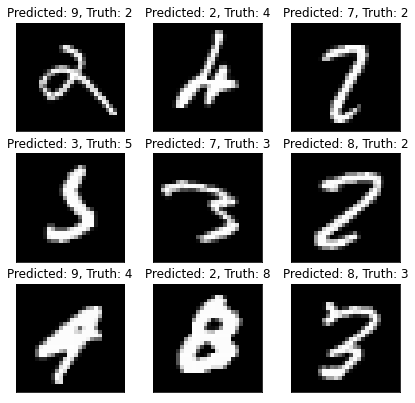

In [ ]:
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(raw_test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Truth: {}".format(prediction[incorrect],
                                        raw_test_labels[incorrect]))
    
    plt.xticks([])
    plt.yticks([])


## Further Work and Recommendation.

Implementing the network 4 that seemed to be the best performing network relatively to all other networks we observed a test accuracy of around 97%, this is good but it can be improved on. We have created a system where we can quicly iterate over different parameters and network architectures to find the best performing combination.

Due to the time constraint on this task we will be unable to iterate over the parameters and network architectures to find the optimal configuration.

Further work would be to:
* Try a new acrhitecture and use the class created to perform comparison of the different architectures and parameters.
* Try new combination of hidden layer and output layer activation functions
* Create deeper and wider networks.